In [1]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data - one cleaned, one not
crime_clean = pd.read_csv('communities-crime-clean.csv')
crime = pd.read_csv('communities-crime-full.csv')
code = pd.read_excel('state and code.xlsx')

## Data cleaning & Pre-processing

In [3]:
# convert all '?' to NaN
crime = crime.replace('?',np.NaN)
# check if there are NA values in the column of ViolentCrimesPerPop
crime.ViolentCrimesPerPop.isna().sum()

0

In [4]:
# find a split point for high crime
import statistics 
avg_vio = (crime.ViolentCrimesPerPop.sum()/crime.ViolentCrimesPerPop.count())
max_vio = crime.ViolentCrimesPerPop.max()
min_vio = crime.ViolentCrimesPerPop.min()
med_vio = statistics.median(crime.ViolentCrimesPerPop)

print('Average violent crime per population is: %0.4f' %avg_vio)
print('Max violent crime per population is: %0.4f' %max_vio)
print('Min violent crime per population is: %0.4f' %min_vio)
print('Median violent crime per population is: %0.4f' %med_vio)
print('Q1 quantile of violent crime per population : ', np.quantile(crime.ViolentCrimesPerPop, .25)) 
print('Q2 quantile of violent crime per population : ', np.quantile(crime.ViolentCrimesPerPop, .50)) 
print('Q3 quantile of violent crime per population : ', np.quantile(crime.ViolentCrimesPerPop, .75)) 
print('100th quantile of violent crime per population : ', np.quantile(crime.ViolentCrimesPerPop, .1)) 

Average violent crime per population is: 0.2380
Max violent crime per population is: 1.0000
Min violent crime per population is: 0.0000
Median violent crime per population is: 0.1500
Q1 quantile of violent crime per population :  0.07
Q2 quantile of violent crime per population :  0.15
Q3 quantile of violent crime per population :  0.33
100th quantile of violent crime per population :  0.03


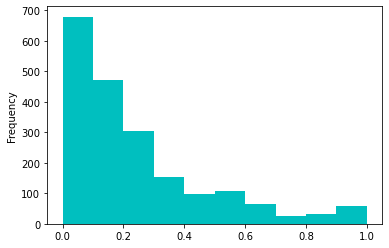

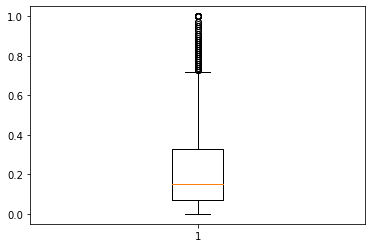

In [5]:
crime['ViolentCrimesPerPop'].plot.hist(color='c')
plt.show()
plt.boxplot(crime['ViolentCrimesPerPop'])
plt.show()

For “ViolentCrimesPerPop”, we calculated the summary statistics in order to determine the best cutoff value to create binary classification. Initially, we considered setting the mean, 0.238, as our cutoff value to determine binary classification for “ViolentCrimesPerPop” but decided that the mean is heavily influenced by the outliers shown in Figure X. Since the median is less distorted by outliers, we decided to use the median, as our cutoff value. We selected Median = 0.15 as our best cutoff value. 

In [6]:
# set median as a threshold to split the data
crime['highCrime'] = np.where(crime.ViolentCrimesPerPop>0.15, 1, 0)

In [7]:
# Extract fold column
fold = crime.fold.astype(int)

In [8]:
# drop columns: communityname, fold, state, community, county 
crime.drop(['communityname','state','community','county','fold','ViolentCrimesPerPop'],axis = 1, inplace=True)
crime = crime.astype(float)

In [9]:
# check if NA value is smaller than half number of column
#for i in crime:
#    print(i,(crime[i].isna().sum()/len(crime[i])))

#### Below are the columns name with the percentage of NA greater than 50%
LemasSwornFT 0.84 \
LemasSwFTPerPop 0.84 \
LemasSwFTFieldOps 0.84 \
LemasSwFTFieldPerPop 0.84 \
LemasTotalReq 0.84 \
LemasTotReqPerPop 0.84 \
PolicReqPerOffic 0.84 \
PolicPerPop 0.84 \
RacialMatchCommPol 0.84 \
PctPolicWhite 0.84 \
PctPolicBlack 0.84 \
PctPolicHisp 0.84 \
PctPolicAsian 0.84 \
PctPolicMinor 0.84 \
OfficAssgnDrugUnits 0.84 \
NumKindsDrugsSeiz 0.84 \
PolicAveOTWorked 0.84 \
PolicCars 0.84 \
PolicOperBudg 0.84 \
LemasPctPolicOnPatr 0.84 \
LemasGangUnitDeploy 0.84 \
PolicBudgPerPop 0.84

In [10]:
# Delete coloums with more than half of NA values
crime = crime.drop(['LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop', 'LemasTotalReq',
                     'LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 
                     'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 
                     'NumKindsDrugsSeiz','PolicAveOTWorked','PolicCars', 'PolicOperBudg','LemasPctPolicOnPatr',
                     'LemasGangUnitDeploy','PolicBudgPerPop'], axis = 1)
crime = crime.fillna(crime.mean()).round(2)
crime['highCrime'] = crime.highCrime.astype(int)
crime.shape

(1994, 101)

In [11]:
pos = crime[(crime['highCrime'] == 1)]
pos_perc = len(pos) / len(crime)
neg_perc = 1 - pos_perc
print('Positive instance percentage is ',pos_perc)
print('Negative instance percentage is ',neg_perc)

Positive instance percentage is  0.4979939819458375
Negative instance percentage is  0.5020060180541626


(0.0, 0.8)

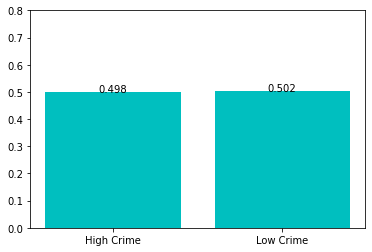

In [12]:
y = [round(pos_perc,4), round(neg_perc,4)]
x = ['High Crime', 'Low Crime']

plt.bar(x,y, align='center', color = 'c')
for i, v in enumerate(y):
    plt.text(x[i], v, str(v),horizontalalignment='center')
plt.ylim(0, 0.8)

## Naive Bayes

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data = pd.DataFrame() 
vif_data["Feature"] = x.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 

vif_data.sort_values('VIF',ascending=False).head(10)

,Feature,VIF
41,TotalPctDiv,8552.221644
73,PctHousOwnOcc,5375.836104
67,PctPersOwnOccup,5214.159673
40,FemalePctDiv,2927.132692
64,PersPerOccupHous,1729.191987
38,MalePctDivorce,1716.129086
80,OwnOccMedVal,1325.125141
43,PctFam2Par,1207.260084
44,PctKids2Par,1137.551208
42,PersPerFam,849.670338


### Method 1: Cross validation

In [13]:
# import data
from sklearn import metrics
# machine learning packages - Naive Bays
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [14]:
# split the data into dependent and indendpent 
x = crime.drop(['highCrime'], axis = 1)
y = crime.highCrime

In [15]:
# Standardize for cross validation method
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x_sd = sc.transform(x)

In [16]:
# w/o training and testing
clf1 = GaussianNB()
clf1 = clf1.fit(x_sd, y)
y_pred = clf1.predict(x_sd)
clf1.score(x_sd, y)

0.7998996990972919

In [17]:
# Check accuracy score for simple naive bays
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(y,y_pred))
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(y,y_pred))
from sklearn.metrics import recall_score
print ('Recall is', recall_score(y,y_pred))

NB_S = np.array([metrics.accuracy_score(y, y_pred) , 
                           metrics.precision_score(y, y_pred), metrics.recall_score(y, y_pred)])

Accuracy is 0.7998996990972919
Precesion is 0.8703241895261845
Recall is 0.702920443101712


In [18]:
# Ignore warning
import warnings 
warnings.filterwarnings('ignore')

# Check accuracy score for cross validation
scores1 = cross_val_score(clf1, x, y, fold, 'accuracy').mean()
print('Average accuracy: ', scores1)
scores2 = cross_val_score(clf1, x, y, fold, 'precision').mean()
print('Average precision: ', scores2)
scores3 = cross_val_score(clf1, x, y, fold, 'recall').mean()
print('Average recall: ', scores3)

NB_CV = np.array([scores1.mean(), scores2.mean(), scores3.mean()])

Average accuracy:  0.8004055364542009
Average precision:  0.8705644530539489
Average recall:  0.7059692401400944


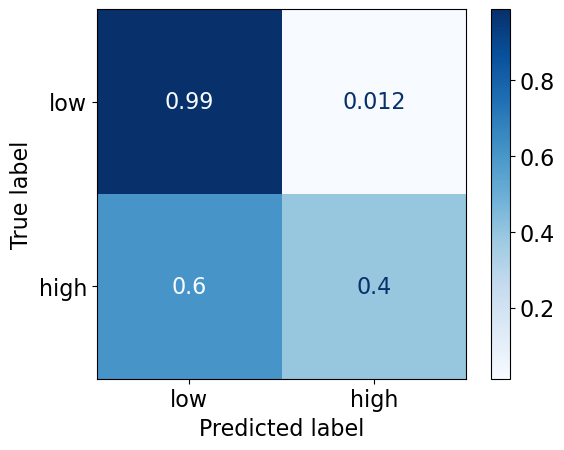

In [145]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(clf1, x, y, display_labels=['low','high'], 
                      cmap=plt.cm.Blues,normalize = 'true')

### Method 2: Traning data and test data

In [20]:
# split data into training and testing
from sklearn import metrics
x_train,x_test,y_train,y_test = train_test_split(crime.drop(['highCrime'], axis=1), 
                                                 crime['highCrime'], test_size = 0.2,random_state = 1)

In [21]:
# Standardize for training and test data
sc.fit(x_train)
x_train_sd = sc.transform(x_train)
x_test_sd = sc.transform(x_test)

In [22]:
# w/ training and testing
clf2 = GaussianNB()
clf2 = clf2.fit(x_train_sd, y_train)
y_pred=clf2.predict(x_test_sd)
clf2.score(x_test_sd, y_test)

0.7944862155388471

In [23]:
# check accuracy
score1 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",score1)
score2 = metrics.precision_score(y_test, y_pred)
print("Precision:",score2) 
score3 = metrics.recall_score(y_test, y_pred)
print("Recall:",score3)
NB_T = np.array([score1, score2, score3])

Accuracy: 0.7944862155388471
Precision: 0.8375
Recall: 0.7052631578947368


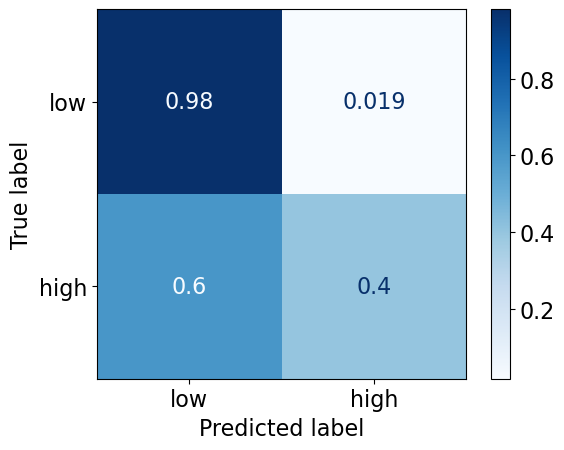

In [170]:
# confusion matrix
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(clf2, x_test, y_test,
                                 display_labels=['low','high'],
                                 cmap=plt.cm.Blues, normalize='true')

## Decision Tree

### Method 1: Cross validation

In [115]:
# import decision tree package 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

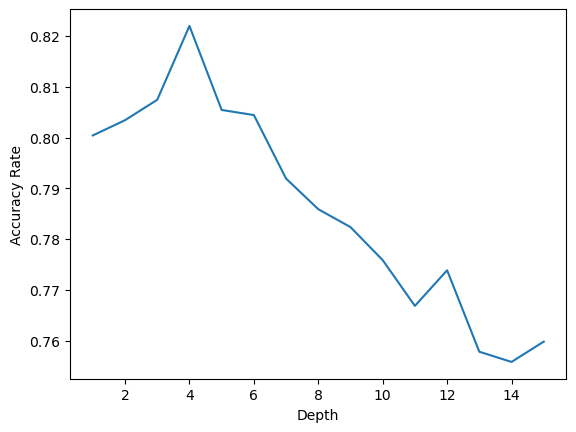

In [116]:
# Find out the optimal tree depth = 4 
# cv = 10 means 10-fold cross validation
a=[]
b=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(x, y)
    y_pred = clf.predict(x)
    scores = cross_val_score(clf, x, y,None,'accuracy',cv=10)
    a.append(i)
    b.append(np.array(scores).mean()) 
plt.plot(a, b)
plt.ylabel('Accuracy Rate')
plt.xlabel('Depth')
plt.show()

In [117]:
# Build decision tree model
clf3 = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 4)
clf3 = clf3.fit(x, y)
y_pred = clf3.predict(x)

[Text(761.1607142857142, 693.0, 'PctKids2Par <= 0.625\nentropy = 1.0\nsamples = 1994\nvalue = [1001, 993]\nclass = low'),
 Text(415.1785714285714, 539.0, 'racePctWhite <= 0.755\nentropy = 0.695\nsamples = 957\nvalue = [179, 778]\nclass = high'),
 Text(221.42857142857142, 385.0, 'NumIlleg <= 0.025\nentropy = 0.371\nsamples = 616\nvalue = [44, 572]\nclass = high'),
 Text(110.71428571428571, 231.0, 'PctEmplProfServ <= 0.835\nentropy = 0.613\nsamples = 238\nvalue = [36, 202]\nclass = high'),
 Text(55.357142857142854, 77.0, 'entropy = 0.551\nsamples = 227\nvalue = [29, 198]\nclass = high'),
 Text(166.07142857142856, 77.0, 'entropy = 0.946\nsamples = 11\nvalue = [7, 4]\nclass = low'),
 Text(332.1428571428571, 231.0, 'MedOwnCostPctInc <= 0.185\nentropy = 0.148\nsamples = 378\nvalue = [8, 370]\nclass = high'),
 Text(276.7857142857143, 77.0, 'entropy = 0.831\nsamples = 19\nvalue = [5, 14]\nclass = high'),
 Text(387.5, 77.0, 'entropy = 0.07\nsamples = 359\nvalue = [3, 356]\nclass = high'),
 Text

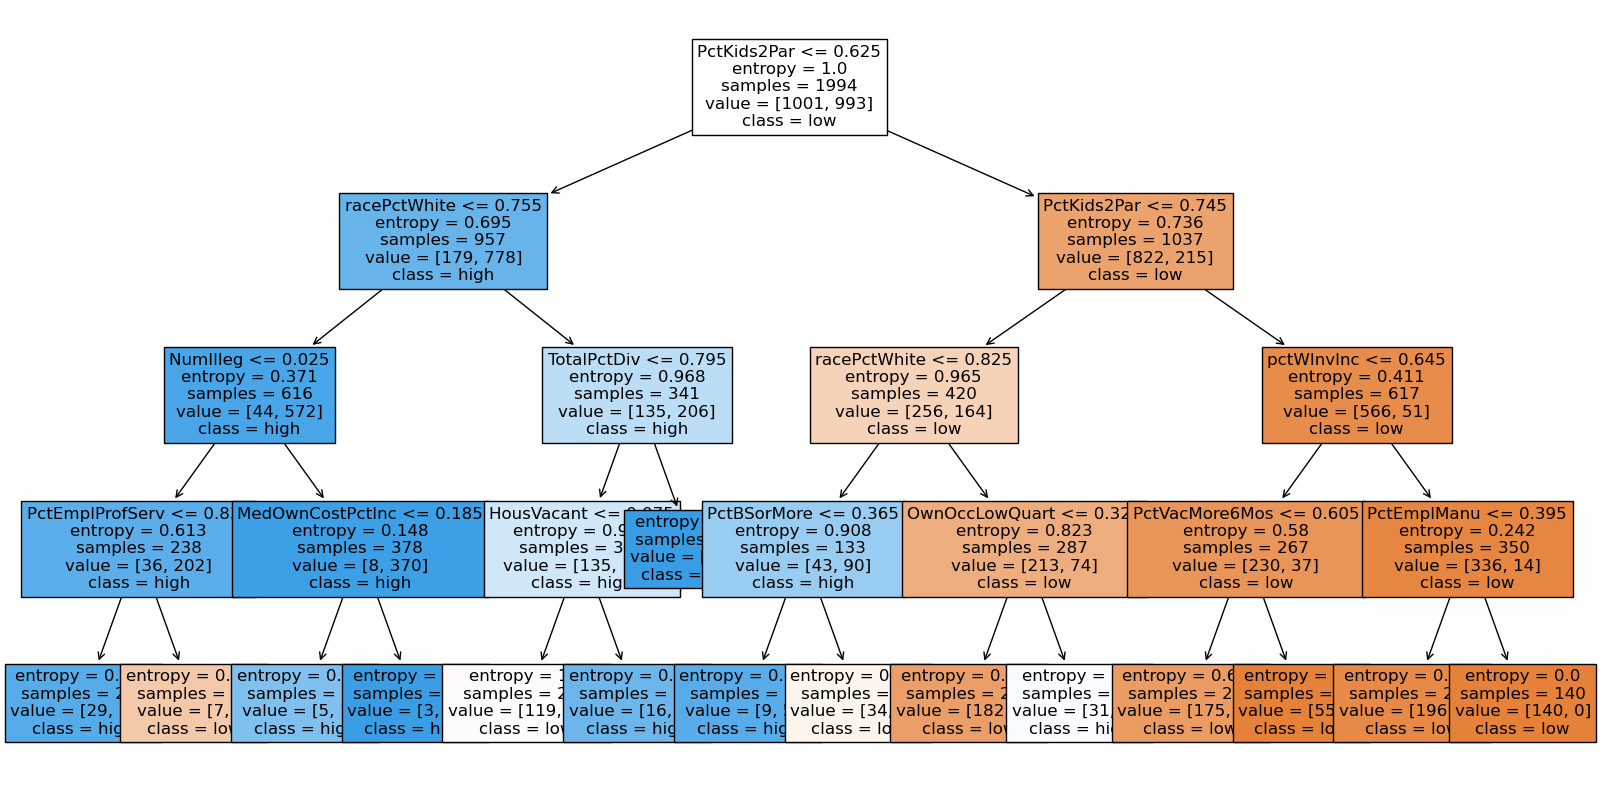

In [118]:
# Draw graph
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(20,10))
tree.plot_tree(clf3, feature_names=list(x), class_names=['low','high'], filled=True,fontsize=12)

In [119]:
# Check accuracy score for cross validation
scores1 = cross_val_score(clf3, x, y, fold, 'accuracy').mean()
print('Average accuracy: ', scores1)
scores2 = cross_val_score(clf3, x, y, fold, 'precision').mean()
print('Average precision: ', scores2)
scores3 = cross_val_score(clf3, x, y, fold, 'recall').mean()
print('Average recall: ', scores3)

DT_CV = np.array([scores1.mean(), scores2.mean(), scores3.mean()])

Average accuracy:  0.795895517688694
Average precision:  0.8346125821524598
Average recall:  0.7463580528907162


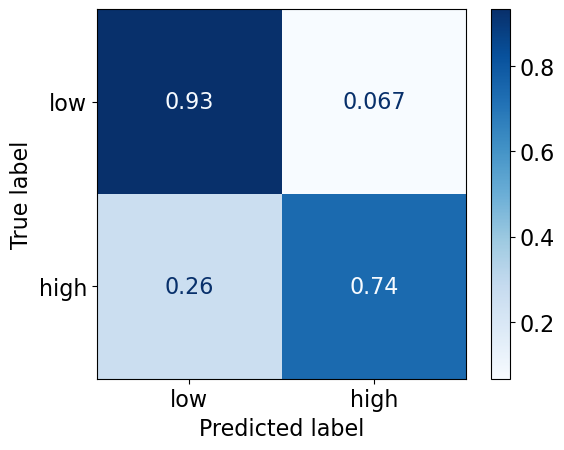

In [182]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(clf3, x_test, y_test, display_labels=['low','high'], cmap=plt.cm.Blues, normalize='true')

### Method 2: Traning data and test data

In [31]:
# build model
clf4 = DecisionTreeClassifier(criterion='entropy',max_depth=4) 
clf4 = clf4.fit(x_train,y_train)
y_pred = clf4.predict(x_test)

[Text(581.25, 693.0, 'PctKids2Par <= 0.625\nentropy = 1.0\nsamples = 1595\nvalue = [792, 803]\nclass = high'),
 Text(290.625, 539.0, 'racePctWhite <= 0.755\nentropy = 0.683\nsamples = 767\nvalue = [139, 628]\nclass = high'),
 Text(145.3125, 385.0, 'NumIlleg <= 0.025\nentropy = 0.363\nsamples = 506\nvalue = [35, 471]\nclass = high'),
 Text(72.65625, 231.0, 'MalePctDivorce <= 0.575\nentropy = 0.599\nsamples = 192\nvalue = [28, 164]\nclass = high'),
 Text(36.328125, 77.0, 'entropy = 0.772\nsamples = 106\nvalue = [24, 82]\nclass = high'),
 Text(108.984375, 77.0, 'entropy = 0.271\nsamples = 86\nvalue = [4, 82]\nclass = high'),
 Text(217.96875, 231.0, 'MedOwnCostPctInc <= 0.185\nentropy = 0.154\nsamples = 314\nvalue = [7, 307]\nclass = high'),
 Text(181.640625, 77.0, 'entropy = 0.852\nsamples = 18\nvalue = [5, 13]\nclass = high'),
 Text(254.296875, 77.0, 'entropy = 0.058\nsamples = 296\nvalue = [2, 294]\nclass = high'),
 Text(435.9375, 385.0, 'racePctWhite <= 0.955\nentropy = 0.97\nsamples =

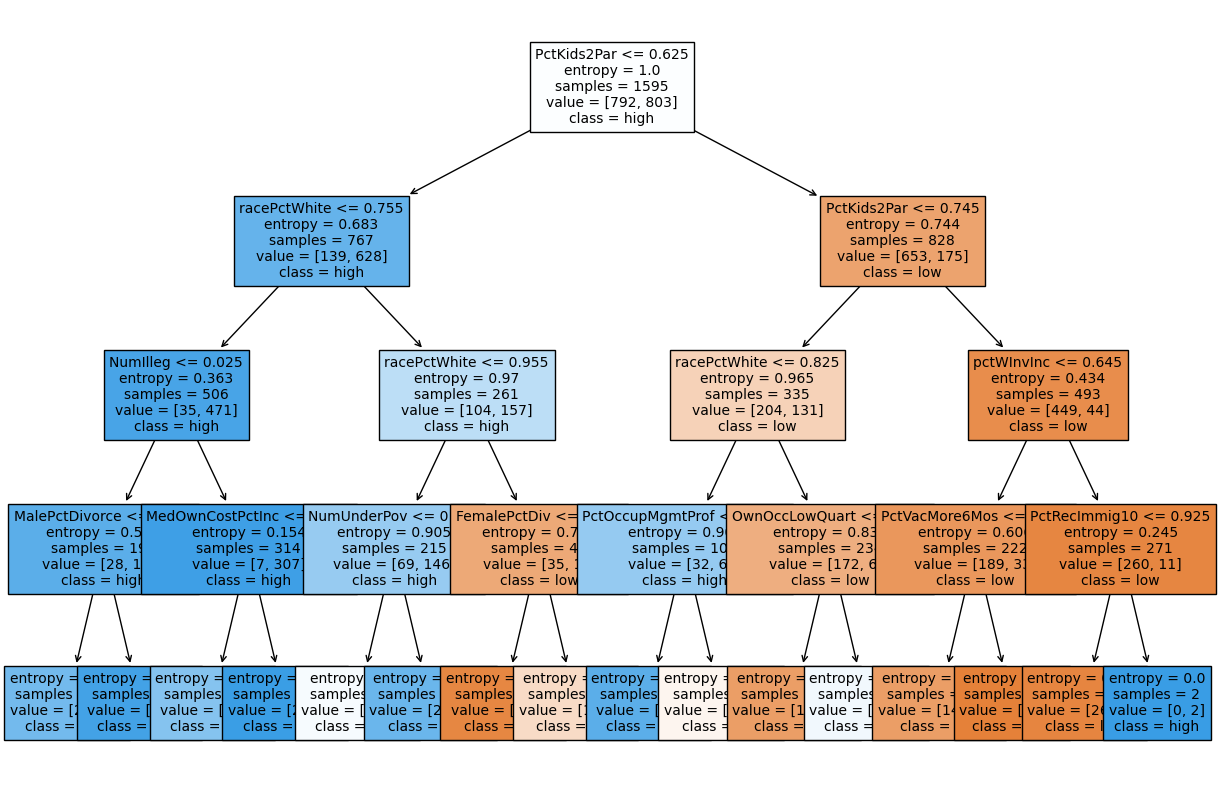

In [165]:
# plot decision tree 
plt.figure(figsize=(15,10))
tree.plot_tree(clf4,feature_names=list(x_train), class_names=['low','high'], fontsize=10,filled=True)

In [33]:
# check accuracy
score1 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",score1)
score2 = metrics.precision_score(y_test, y_pred)
print("Precision:",score2) 
score3 = metrics.recall_score(y_test, y_pred)
print("Recall:",score3)
DT_T = np.array([score1, score2, score3])

Accuracy: 0.8270676691729323
Precision: 0.8071065989847716
Recall: 0.8368421052631579


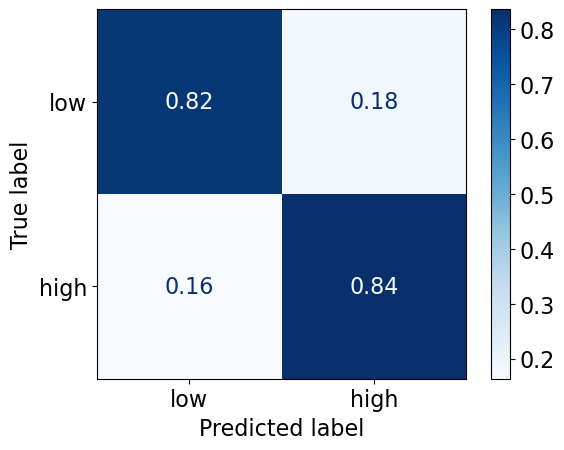

In [181]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(clf4, x_test, y_test, display_labels=['low','high'], 
                      cmap=plt.cm.Blues, normalize='true')

## Random Forest

### Method 1: Cross validation

In [35]:
# import package
from sklearn.ensemble import RandomForestClassifier

In [110]:
# Build random forest model
rfc1 = RandomForestClassifier(n_estimators=20, max_features='sqrt', criterion='entropy', 
                              max_depth=4)
rfc1 = rfc1.fit(x, y)
y_pred = rfc1.predict(x)

In [111]:
# Check accuracy score for cross validation
scores1 = cross_val_score(rfc1, x, y, fold, 'accuracy').mean()
print('Average accuracy: ', scores1)
scores2 = cross_val_score(rfc1, x, y, fold, 'precision').mean()
print('Average precision: ', scores2)
scores3 = cross_val_score(rfc1, x, y, fold, 'recall').mean()
print('Average recall: ', scores3)

RF_CV = np.array([scores1.mean(), scores2.mean(), scores3.mean()])

Average accuracy:  0.8309983501467235
Average precision:  0.84246681319297
Average recall:  0.8278209227957971


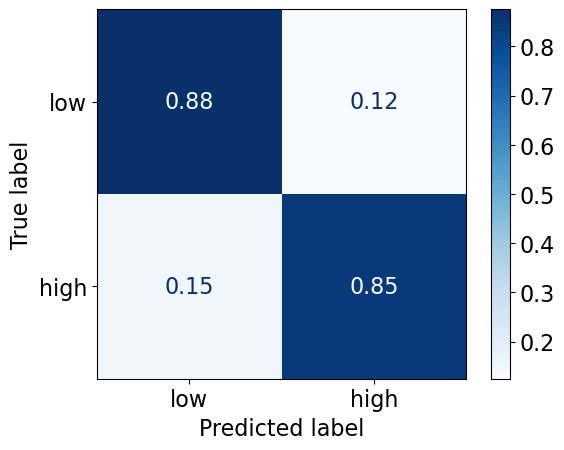

In [175]:
# confusion matrix
plt.rcParams.update({'font.size': 16})
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc1, x_test, y_test, display_labels=['low','high'], 
                      fontsize=10,cmap=plt.cm.Blues, normalize = 'true')

[Text(591.6294642857143, 693.0, 'racePctWhite <= 0.855\nentropy = 1.0\nsamples = 1266\nvalue = [1023, 971]\nclass = low'),
 Text(332.14285714285717, 539.0, 'PctUnemployed <= 0.285\nentropy = 0.805\nsamples = 675\nvalue = [258, 791]\nclass = high'),
 Text(166.07142857142858, 385.0, 'PctFam2Par <= 0.745\nentropy = 0.997\nsamples = 182\nvalue = [154, 136]\nclass = low'),
 Text(83.03571428571429, 231.0, 'PctForeignBorn <= 0.355\nentropy = 0.912\nsamples = 112\nvalue = [57, 117]\nclass = high'),
 Text(41.517857142857146, 77.0, 'entropy = 0.978\nsamples = 74\nvalue = [48, 68]\nclass = high'),
 Text(124.55357142857144, 77.0, 'entropy = 0.623\nsamples = 38\nvalue = [9, 49]\nclass = high'),
 Text(249.1071428571429, 231.0, 'MedRentPctHousInc <= 0.61\nentropy = 0.643\nsamples = 70\nvalue = [97, 19]\nclass = low'),
 Text(207.58928571428572, 77.0, 'entropy = 0.423\nsamples = 56\nvalue = [85, 8]\nclass = low'),
 Text(290.625, 77.0, 'entropy = 0.999\nsamples = 14\nvalue = [12, 11]\nclass = low'),
 Te

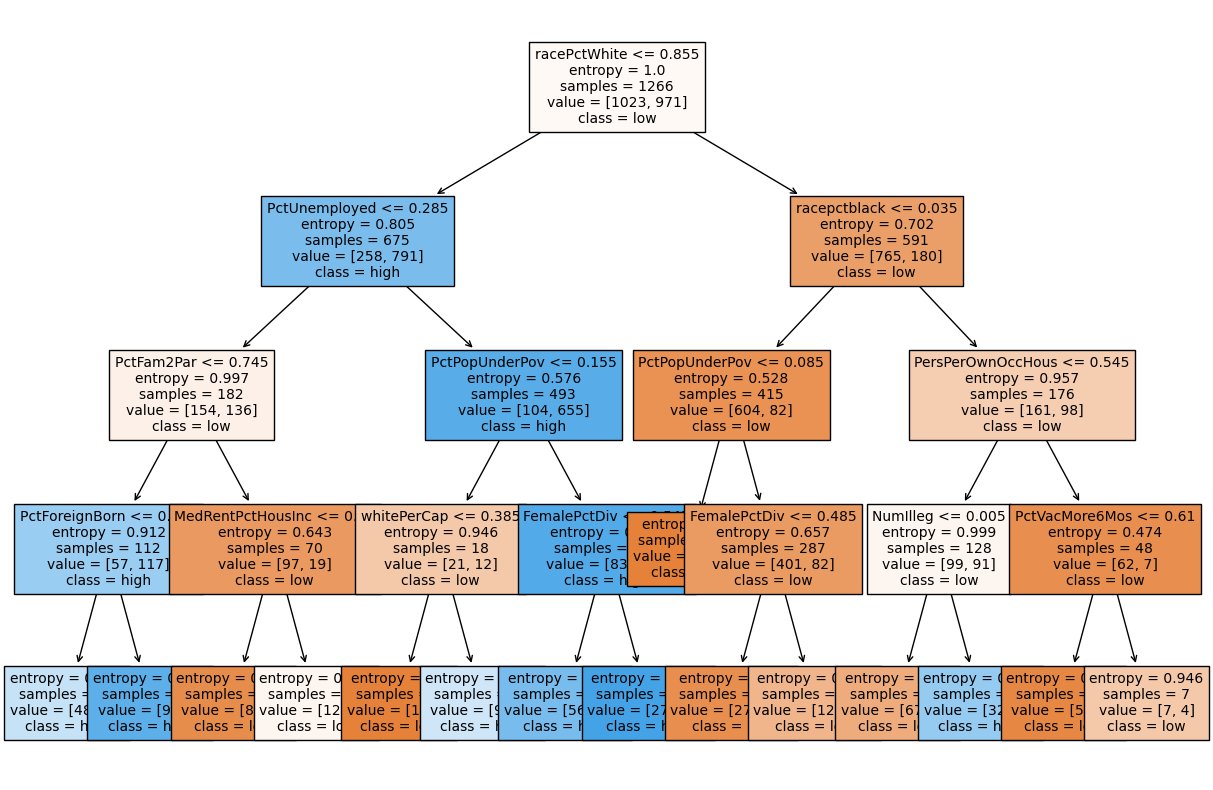

In [164]:
# plot the second random forest tree
plt.figure(figsize=(15,10))
tree.plot_tree(rfc1.estimators_[1],feature_names=list(x_train), 
                         class_names=['low','high'],fontsize = 10,filled=True)

### Method 2: Traning data and test data

In [40]:
# build random forest model
rfc2 = RandomForestClassifier(n_estimators=20, max_features = 'sqrt',criterion='entropy',
                              max_depth=4)
rfc2 = rfc2.fit(x_train,y_train)
y_pred = rfc2.predict(x_test)

[Text(612.3883928571429, 693.0, 'NumUnderPov <= 0.015\nentropy = 1.0\nsamples = 1005\nvalue = [791, 804]\nclass = high'),
 Text(332.14285714285717, 539.0, 'PctYoungKids2Par <= 0.845\nentropy = 0.758\nsamples = 425\nvalue = [546, 153]\nclass = low'),
 Text(166.07142857142858, 385.0, 'NumUnderPov <= 0.005\nentropy = 0.941\nsamples = 209\nvalue = [222, 124]\nclass = low'),
 Text(83.03571428571429, 231.0, 'PctEmplProfServ <= 0.32\nentropy = 0.342\nsamples = 27\nvalue = [44, 3]\nclass = low'),
 Text(41.517857142857146, 77.0, 'entropy = 0.672\nsamples = 11\nvalue = [14, 3]\nclass = low'),
 Text(124.55357142857144, 77.0, 'entropy = 0.0\nsamples = 16\nvalue = [30, 0]\nclass = low'),
 Text(249.1071428571429, 231.0, 'PctLargHouseFam <= 0.295\nentropy = 0.974\nsamples = 182\nvalue = [178, 121]\nclass = low'),
 Text(207.58928571428572, 77.0, 'entropy = 0.931\nsamples = 154\nvalue = [166, 88]\nclass = low'),
 Text(290.625, 77.0, 'entropy = 0.837\nsamples = 28\nvalue = [12, 33]\nclass = high'),
 Tex

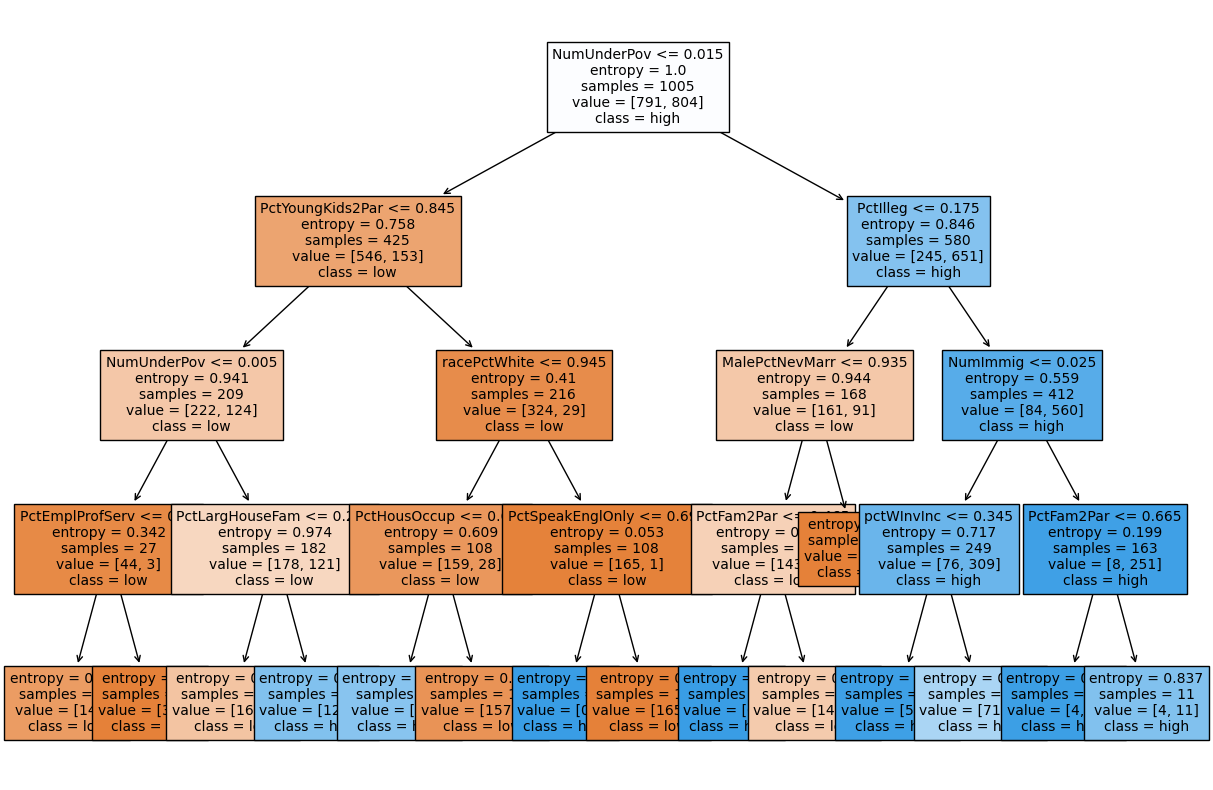

In [166]:
# plot the first random forest tree
plt.figure(figsize=(15,10))
tree.plot_tree(rfc2.estimators_[0],feature_names=list(x_train), fontsize=10,class_names=['low','high'], filled=True)

In [42]:
# check accuracy
score1 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",score1)
score2 = metrics.precision_score(y_test, y_pred)
print("Precision:",score2) 
score3 = metrics.recall_score(y_test, y_pred)
print("Recall:",score3)
RF_T = np.array([score1, score2, score3])

Accuracy: 0.849624060150376
Precision: 0.8385416666666666
Recall: 0.8473684210526315


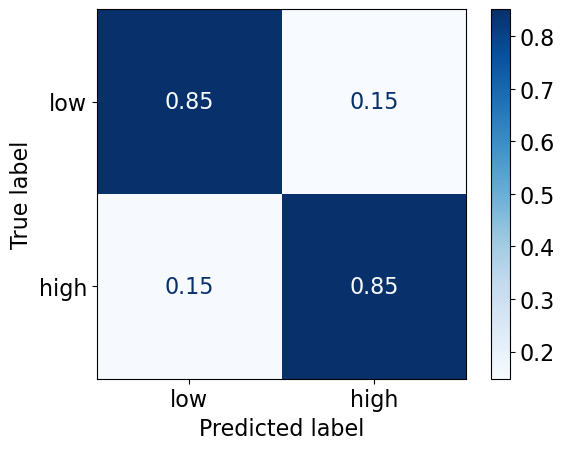

In [179]:
# confusion matrix
plt.rcParams.update({'font.size': 16})
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc2, x_test, y_test, display_labels=['low','high'],cmap=plt.cm.Blues, normalize = 'true')

## PCA 

### Method 1: Cross Validation

In [44]:
# import package
from sklearn.decomposition import PCA
import seaborn as sns

In [45]:
# Create a table for PCA variance ratio 
# Using standardized value for PCA 
# choose 23 components to retain 90% of the variance
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
dfpca = PCA().fit(x_sd)
pca = pd.DataFrame()
pca['Cumulative Variance Ratio'] = np.cumsum(dfpca.explained_variance_ratio_)
pca['Explained Variance Ratio'] = dfpca.explained_variance_ratio_
pca.iloc[15:26]

,Cumulative Variance Ratio,Explained Variance Ratio
15,0.857003,0.008921
16,0.865629,0.008626
17,0.873105,0.007477
18,0.880060,0.006955
19,0.886483,0.006423
20,0.892731,0.006248
21,0.898692,0.005961
22,0.904052,0.005360
23,0.909252,0.005200
24,0.914118,0.004866


Text(0, 0.5, 'cumulative explained variance')

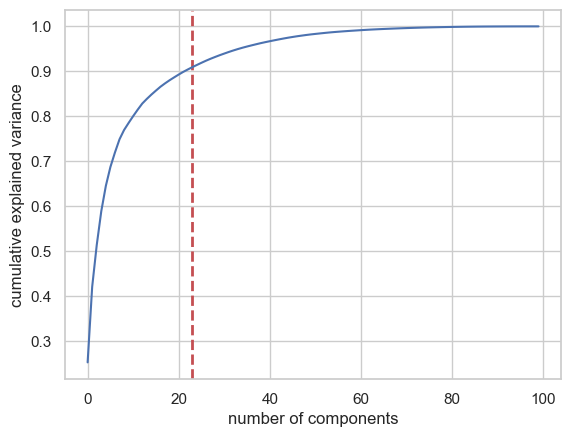

In [46]:
# plot cumulative explained variance ratio
sns.set(style='whitegrid')
plt.axvline(linewidth=2, color='r', linestyle = '--', x=23, ymin=0, ymax=1)
plt.plot(np.cumsum(dfpca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [47]:
# transform dataset with PCA
dfpca = PCA(n_components=23)
dfpca.fit(x_sd)
x_pca = dfpca.transform(x_sd)
pca = pd.DataFrame()
pca['Cumulative Variance Ratio'] = np.cumsum(dfpca.explained_variance_ratio_)
pca['Explained Variance Ratio'] = dfpca.explained_variance_ratio_

In [48]:
# Dump components relations with features:
# https://towardsdatascience.com/machine-learning-step-by-step-6fbde95c455a
pca_dims = []
for i in range(0, len(pca)):
    pca_dims.append('PCA Component {}'.format(i))
pca_test = pd.DataFrame(dfpca.components_,columns=x
                        .columns,index = pca_dims)
pca_test.T.head(10)

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9,...,PCA Component 13,PCA Component 14,PCA Component 15,PCA Component 16,PCA Component 17,PCA Component 18,PCA Component 19,PCA Component 20,PCA Component 21,PCA Component 22
population,0.052484,0.089938,0.148569,-0.090168,0.276692,-0.003088,0.094244,0.081390,-0.015929,0.002194,...,-0.004990,0.032999,-0.002189,-0.002369,-0.003765,-0.010036,0.014112,-0.038644,-0.065178,-0.114961
householdsize,-0.009181,0.113770,-0.223002,0.097126,0.121399,0.094110,-0.018291,-0.064477,0.072684,-0.039726,...,0.040836,-0.034471,0.003947,-0.006767,0.055104,0.039565,-0.022465,0.074312,0.074033,-0.012216
racepctblack,0.106732,0.007532,0.080150,-0.031845,0.054243,0.061043,-0.274585,-0.222711,-0.040815,0.013817,...,0.215952,-0.052979,0.015829,0.006946,-0.047921,-0.030028,-0.021706,-0.017822,-0.188464,0.102312
racePctWhite,-0.115296,-0.119218,-0.004875,0.035552,-0.019733,-0.023285,0.185028,0.180706,0.060039,0.005299,...,-0.147145,0.038260,0.016180,-0.026543,-0.011146,0.013056,0.021732,0.070734,0.212104,-0.068102
racePctAsian,-0.047088,0.167325,0.033590,-0.001928,-0.056579,-0.035549,0.001401,0.041976,-0.061724,-0.137545,...,-0.019606,-0.100921,-0.092473,0.139944,0.247658,-0.134039,0.133244,-0.246682,-0.214965,0.118654
racePctHisp,0.067376,0.162357,-0.133746,-0.032734,-0.033647,-0.054242,0.129471,-0.007302,-0.006953,0.056000,...,-0.066339,0.115256,0.011609,-0.065902,-0.040675,0.060845,-0.068307,0.003020,0.047219,-0.042072
agePct12t21,0.062302,0.034947,-0.056512,0.240271,0.067857,0.229090,0.003474,0.014069,0.103592,-0.039393,...,0.066314,0.095525,-0.010541,-0.018216,0.101235,0.040342,-0.011585,0.032633,0.038713,0.083831
agePct12t29,0.073653,0.079394,0.017049,0.253777,0.036771,0.118827,-0.063797,0.100004,0.196027,-0.004658,...,0.031961,0.099092,-0.024036,-0.031583,0.071529,0.070937,-0.009632,0.037557,-0.044227,0.082529
agePct16t24,0.063319,0.050585,0.038534,0.242884,0.004199,0.214808,-0.009523,0.088771,0.180525,-0.011945,...,0.066483,0.127784,-0.019888,-0.043705,0.087766,0.077691,-0.029852,0.045371,-0.018293,0.115854
agePct65up,0.033456,-0.111218,0.075911,-0.199809,-0.182814,0.066665,0.162837,0.025952,-0.047791,0.034373,...,0.049416,0.019686,0.019137,0.005051,-0.037741,0.011637,-0.045272,0.089966,0.004696,-0.021824


### Method 2: Traning data and test data

#### Training data

In [197]:
# Create a table for PCA variance ratio 
# Using standardized value for PCA 
# choose 23 components to retain 90% of the variance
dfpca = PCA().fit(x_train_sd)
pca = pd.DataFrame()
pca['Cumulative Variance Ratio'] = np.cumsum(dfpca.explained_variance_ratio_)
pca['Explained Variance Ratio'] = dfpca.explained_variance_ratio_
pca.iloc[15:26]

,Cumulative Variance Ratio,Explained Variance Ratio
15,0.856756,0.008927
16,0.865351,0.008595
17,0.872908,0.007557
18,0.879904,0.006996
19,0.886329,0.006425
20,0.892726,0.006397
21,0.898621,0.005895
22,0.904044,0.005423
23,0.909303,0.005259
24,0.914201,0.004898


Text(0, 0.5, 'cumulative explained variance')

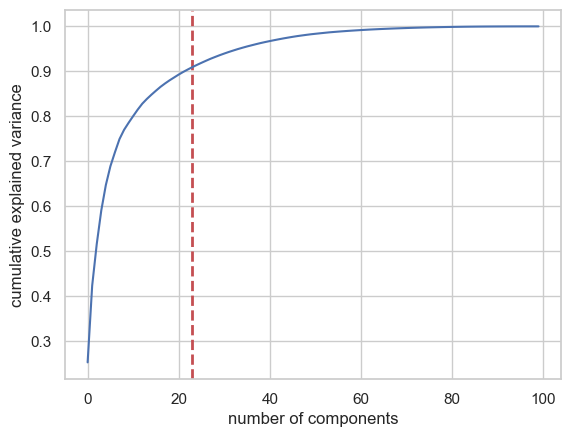

In [50]:
# plot cumulative explained variance ratio
sns.set(style='whitegrid')
plt.axvline(linewidth=2, color='r', linestyle = '--', x=23, ymin=0, ymax=1)
plt.plot(np.cumsum(dfpca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [202]:
len(x_train_pca[0])

23

In [51]:
# transform training dataset with PCA
dfpac = PCA(n_components=23)
dfpac.fit(x_train_sd)
x_train_pca = dfpac.transform(x_train_sd)

#### Testing data

In [52]:
# Create a table for PCA variance ratio 
# Using standardized value for PCA 
# choose 23 components to retain 90% of the variance
dfpac = PCA().fit(x_test_sd)
pca = pd.DataFrame()
pca['Cumulative Variance Ratio'] = np.cumsum(dfpca.explained_variance_ratio_)
pca['Explained Variance Ratio'] = dfpac.explained_variance_ratio_
pca.iloc[15:26]

,Cumulative Variance Ratio,Explained Variance Ratio
15,0.856756,0.010006
16,0.865351,0.008391
17,0.872908,0.007570
18,0.879904,0.007090
19,0.886329,0.006597
20,0.892726,0.006130
21,0.898621,0.005721
22,0.904044,0.005465
23,0.909303,0.005321
24,0.914201,0.005043


Text(0, 0.5, 'cumulative explained variance')

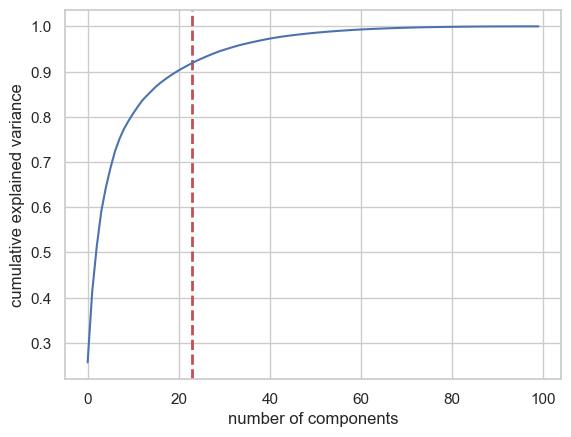

In [53]:
# plot cumulative explained variance ratio
sns.set(style='whitegrid')
plt.axvline(linewidth=2, color='r', linestyle = '--', x=23, ymin=0, ymax=1)
plt.plot(np.cumsum(dfpac.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [54]:
# transform training dataset with PCA
dfpac = PCA(n_components=23)
dfpac.fit(x_test_sd)
x_test_pca = dfpac.transform(x_test_sd)

## PCA & Naive Bays

### Method 1: Cross Validation

In [55]:
# #The text in this paragraph is almost an exact copy of what was written earlier. 
# #PCA is effected by scale so you need to scale the features in the data before applying PCA. 
# #You can transform the data onto unit scale (mean = 0 and variance = 1) 
# #which is a requirement for the optimal performance of many machine learning algorithms.

#PCA is effected by scale so you need to scale the features in the data before applying PCA. 
#You can transform the data onto unit scale (mean = 0 and variance = 1) 
#which is a requirement for the optimal performance of many machine learning algorithms.

In [151]:
# PCA w/o training and testing

clf5 = GaussianNB()
clf5 = clf.fit(x_pca, y)
#y_pred=clf5.predict(x_test_pca)

In [204]:
len(x_pca[0])

23

In [57]:
# Check accuracy score for cross validation
scores1 = cross_val_score(clf5, x_pca, y, fold, 'accuracy').mean()
print('Average accuracy: ', scores1)
scores2 = cross_val_score(clf5, x_pca, y, fold, 'precision').mean()
print('Average precision: ', scores2)
scores3 = cross_val_score(clf5, x_pca, y, fold, 'recall').mean()
print('Average recall: ', scores3)

NB_CV_PCA = np.array([scores1.mean(), scores2.mean(), scores3.mean()])

Average accuracy:  0.7276999030238913
Average precision:  0.7306747697292455
Average recall:  0.7401908532561798


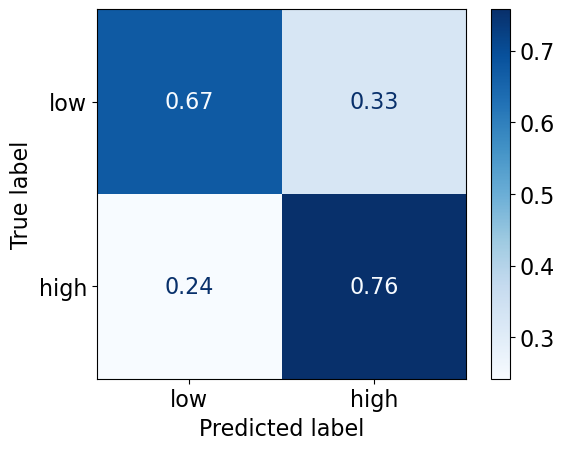

In [174]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(clf5, x_test_pca, y_test, display_labels=['low','high'], cmap=plt.cm.Blues,normalize='true')
plt.grid(False)

### Method 2: Traning data and test data

In [59]:
# build Naive Bays model
clf6 = GaussianNB()
clf6 = clf6.fit(x_train_pca, y_train)
y_pred=clf6.predict(x_test_pca)

In [60]:
# check accuracy
score1 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",score1)
score2 = metrics.precision_score(y_test, y_pred)
print("Precision:",score2) 
score3 = metrics.recall_score(y_test, y_pred)
print("Recall:",score3)
NB_T_PCA = np.array([score1, score2, score3])

Accuracy: 0.706766917293233
Precision: 0.7109826589595376
Recall: 0.6473684210526316


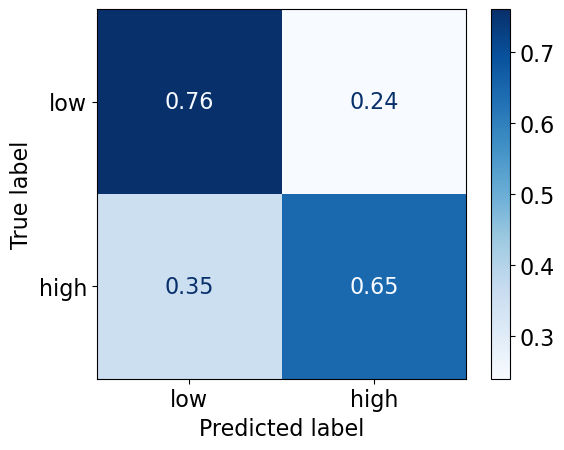

In [177]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(clf6, x_test_pca, y_test, display_labels=['low','high'], 
                      normalize = 'true',cmap=plt.cm.Blues)
plt.grid(False)

## PCA & Random Forest

### Method 1: Cross Validation

In [62]:
# build PCA & random forest
rfc3 = RandomForestClassifier(n_estimators=20, max_features = 'sqrt', criterion='entropy',max_depth=4)
rfc3 = rfc3.fit(x_pca, y)

[Text(531.1422413793103, 693.0, 'pctWInvInc <= -0.835\nentropy = 0.999\nsamples = 1260\nvalue = [1026, 968]\nclass = low'),
 Text(220.47413793103448, 539.0, 'medIncome <= -0.293\nentropy = 0.756\nsamples = 155\nvalue = [183, 51]\nclass = low'),
 Text(80.17241379310344, 385.0, 'pctWFarmSelf <= 0.148\nentropy = 0.922\nsamples = 61\nvalue = [63, 32]\nclass = low'),
 Text(40.08620689655172, 231.0, 'entropy = 0.0\nsamples = 19\nvalue = [29, 0]\nclass = low'),
 Text(120.25862068965517, 231.0, 'agePct12t29 <= 0.036\nentropy = 0.999\nsamples = 42\nvalue = [34, 32]\nclass = low'),
 Text(80.17241379310344, 77.0, 'entropy = 0.902\nsamples = 25\nvalue = [14, 30]\nclass = high'),
 Text(160.3448275862069, 77.0, 'entropy = 0.439\nsamples = 17\nvalue = [20, 2]\nclass = low'),
 Text(360.7758620689655, 385.0, 'medFamInc <= 0.785\nentropy = 0.576\nsamples = 94\nvalue = [120, 19]\nclass = low'),
 Text(280.60344827586204, 231.0, 'population <= -2.167\nentropy = 0.329\nsamples = 77\nvalue = [109, 7]\nclass 

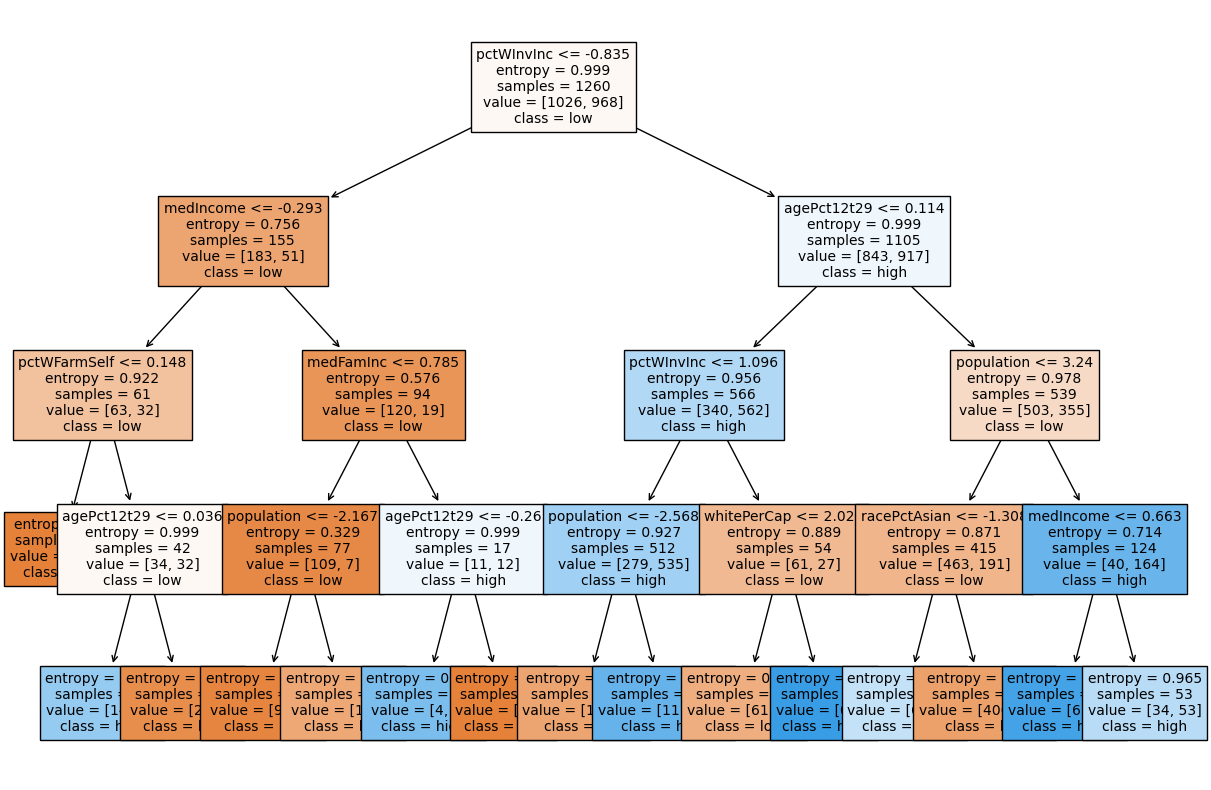

In [158]:
# plot the first random forest tree
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15,10))
tree.plot_tree(rfc3.estimators_[0],feature_names=list(x), class_names=['low','high'], 
               fontsize=10,filled=True)

In [64]:
# Check accuracy score for cross validation
scores1 = cross_val_score(rfc3, x_pca, y, fold, 'accuracy').mean()
print('Average accuracy: ', scores1)
scores2 = cross_val_score(rfc3, x_pca, y, fold, 'precision').mean()
print('Average precision: ', scores2)
scores3 = cross_val_score(rfc3, x_pca, y, fold, 'recall').mean()
print('Average recall: ', scores3)

RF_CV_PCA = np.array([scores1.mean(), scores2.mean(), scores3.mean()])

Average accuracy:  0.7853578670293825
Average precision:  0.8103489808731814
Average recall:  0.7633318105679915


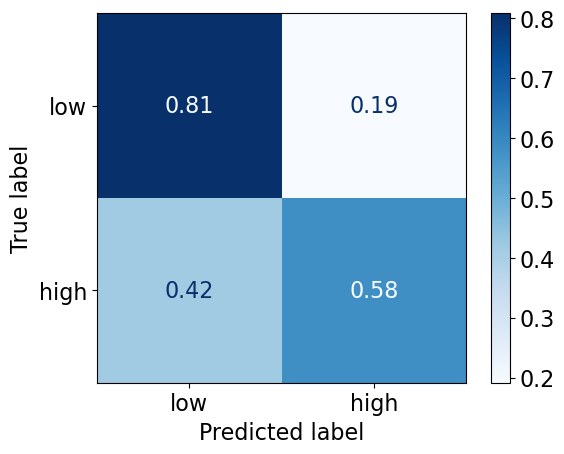

In [176]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(rfc3, x_test_pca, y_test, display_labels=['low','high'], cmap=plt.cm.Blues,normalize='true')
plt.grid(False)

### Method2: Traning data and test data

In [66]:
# build PCA & random forest model
rfc4 = RandomForestClassifier(n_estimators=20, max_features = 'sqrt',criterion='entropy',
                              max_depth=4)
rfc4 = rfc4.fit(x_train_pca,y_train)
y_pred = rfc4.predict(x_test_pca)

[Text(581.25, 693.0, 'pctWSocSec <= 0.496\nentropy = 1.0\nsamples = 989\nvalue = [783, 812]\nclass = high'),
 Text(266.40625, 539.0, 'racepctblack <= -4.379\nentropy = 0.994\nsamples = 720\nvalue = [533, 637]\nclass = high'),
 Text(145.3125, 385.0, 'householdsize <= 6.47\nentropy = 0.513\nsamples = 46\nvalue = [8, 62]\nclass = high'),
 Text(96.875, 231.0, 'householdsize <= 5.562\nentropy = 0.811\nsamples = 21\nvalue = [8, 24]\nclass = high'),
 Text(48.4375, 77.0, 'entropy = 0.722\nsamples = 19\nvalue = [6, 24]\nclass = high'),
 Text(145.3125, 77.0, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = low'),
 Text(193.75, 231.0, 'entropy = 0.0\nsamples = 25\nvalue = [0, 38]\nclass = high'),
 Text(387.5, 385.0, 'householdsize <= 5.175\nentropy = 0.999\nsamples = 674\nvalue = [525, 575]\nclass = high'),
 Text(290.625, 231.0, 'agePct12t29 <= -2.325\nentropy = 1.0\nsamples = 612\nvalue = [508, 491]\nclass = low'),
 Text(242.1875, 77.0, 'entropy = 0.595\nsamples = 56\nvalue = [14, 83]\nclass

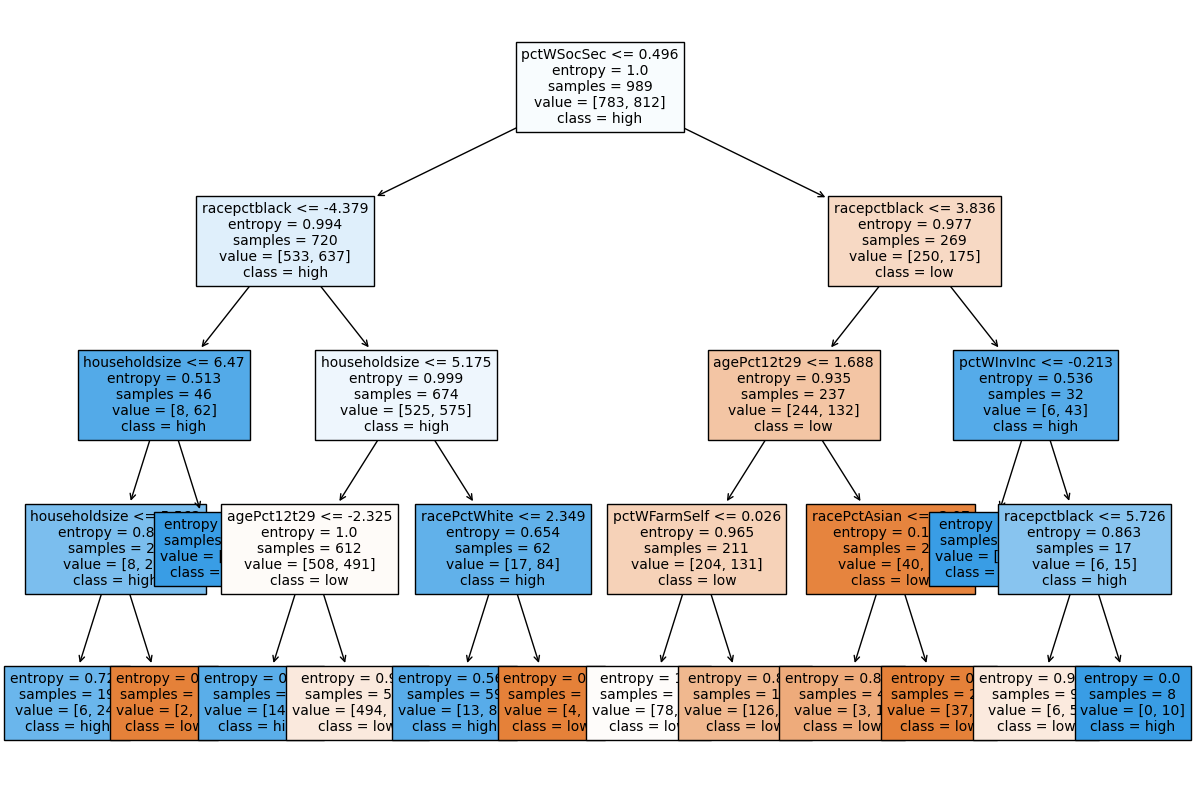

In [159]:
# plot the first random forest tree
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15,10))
tree.plot_tree(rfc4.estimators_[0],feature_names=list(x_train), 
               fontsize = 10,class_names=['low','high'], filled=True)

In [68]:
# check accuracy
score1 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",score1)
score2 = metrics.precision_score(y_test, y_pred)
print("Precision:",score2) 
score3 = metrics.recall_score(y_test, y_pred)
print("Recall:",score3)
RF_T_PCA = np.array([score1, score2, score3])

Accuracy: 0.7468671679197995
Precision: 0.7089201877934272
Recall: 0.7947368421052632


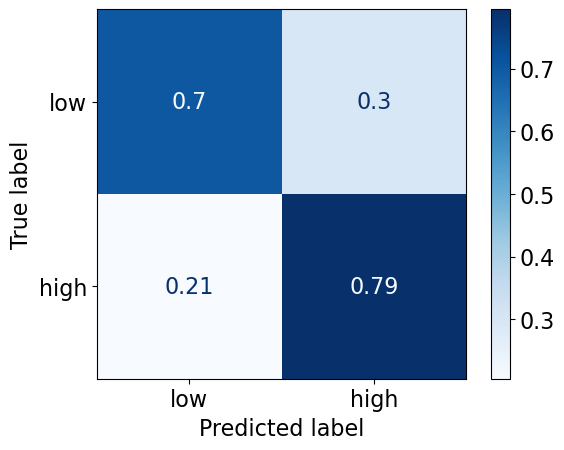

In [184]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(rfc4, x_test_pca, y_test, 
                      display_labels=['low','high'], normalize='true',
                      cmap=plt.cm.Blues)

### Data Frame for Accuracy

In [189]:
array = [NB_T, NB_T_PCA, DT_T, RF_T, RF_T_PCA]
df = pd.DataFrame(array, columns=['Accuracy', 'Precision', 'Recall'])

df.index = ['Naive Bayes(Benchmark)','PCA&Naive Bayes','Decision Tree(Benchmark)',
            'Random Forest','PCA&Random Forest'] 

df 

,Accuracy,Precision,Recall
Naive Bayes(Benchmark),0.794486,0.837500,0.705263
PCA&Naive Bayes,0.706767,0.710983,0.647368
Decision Tree(Benchmark),0.827068,0.807107,0.836842
Random Forest,0.849624,0.838542,0.847368
PCA&Random Forest,0.746867,0.708920,0.794737


In [191]:
array = [NB_CV, NB_CV_PCA, RF_CV, RF_CV_PCA]
dfcv = pd.DataFrame(array, columns=['Accuracy', 'Precision', 'Recall'])

dfcv.index = ['Naive Bayes CV','PCA&Naive Bayes CV',
              'Random Forest CV','PCA&Random Forest CV'] 

dfcv 

,Accuracy,Precision,Recall
Naive Bayes CV,0.800406,0.870564,0.705969
PCA&Naive Bayes CV,0.727700,0.730675,0.740191
Random Forest CV,0.830998,0.842467,0.827821
PCA&Random Forest CV,0.785358,0.810349,0.763332


### Feature Importance

In [71]:
# Feature importance
feats = {}
for feature, importance in zip(crime.columns, rfc3.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Entropy_Importance'})
importances = importances.sort_values(by='Entropy_Importance', ascending=False).reset_index().rename(columns={'index': 'Features'})

In [72]:
# top 20 importances
importances_top = importances.iloc[0:21,:]
importances_top

,Features,Entropy_Importance
0,population,0.270221
1,agePct12t21,0.154037
2,householdsize,0.097626
3,racepctblack,0.086150
4,pctWInvInc,0.071697
5,racePctAsian,0.071597
6,agePct12t29,0.056663
7,racePctHisp,0.033688
8,pctWRetire,0.026891
9,racePctWhite,0.019514


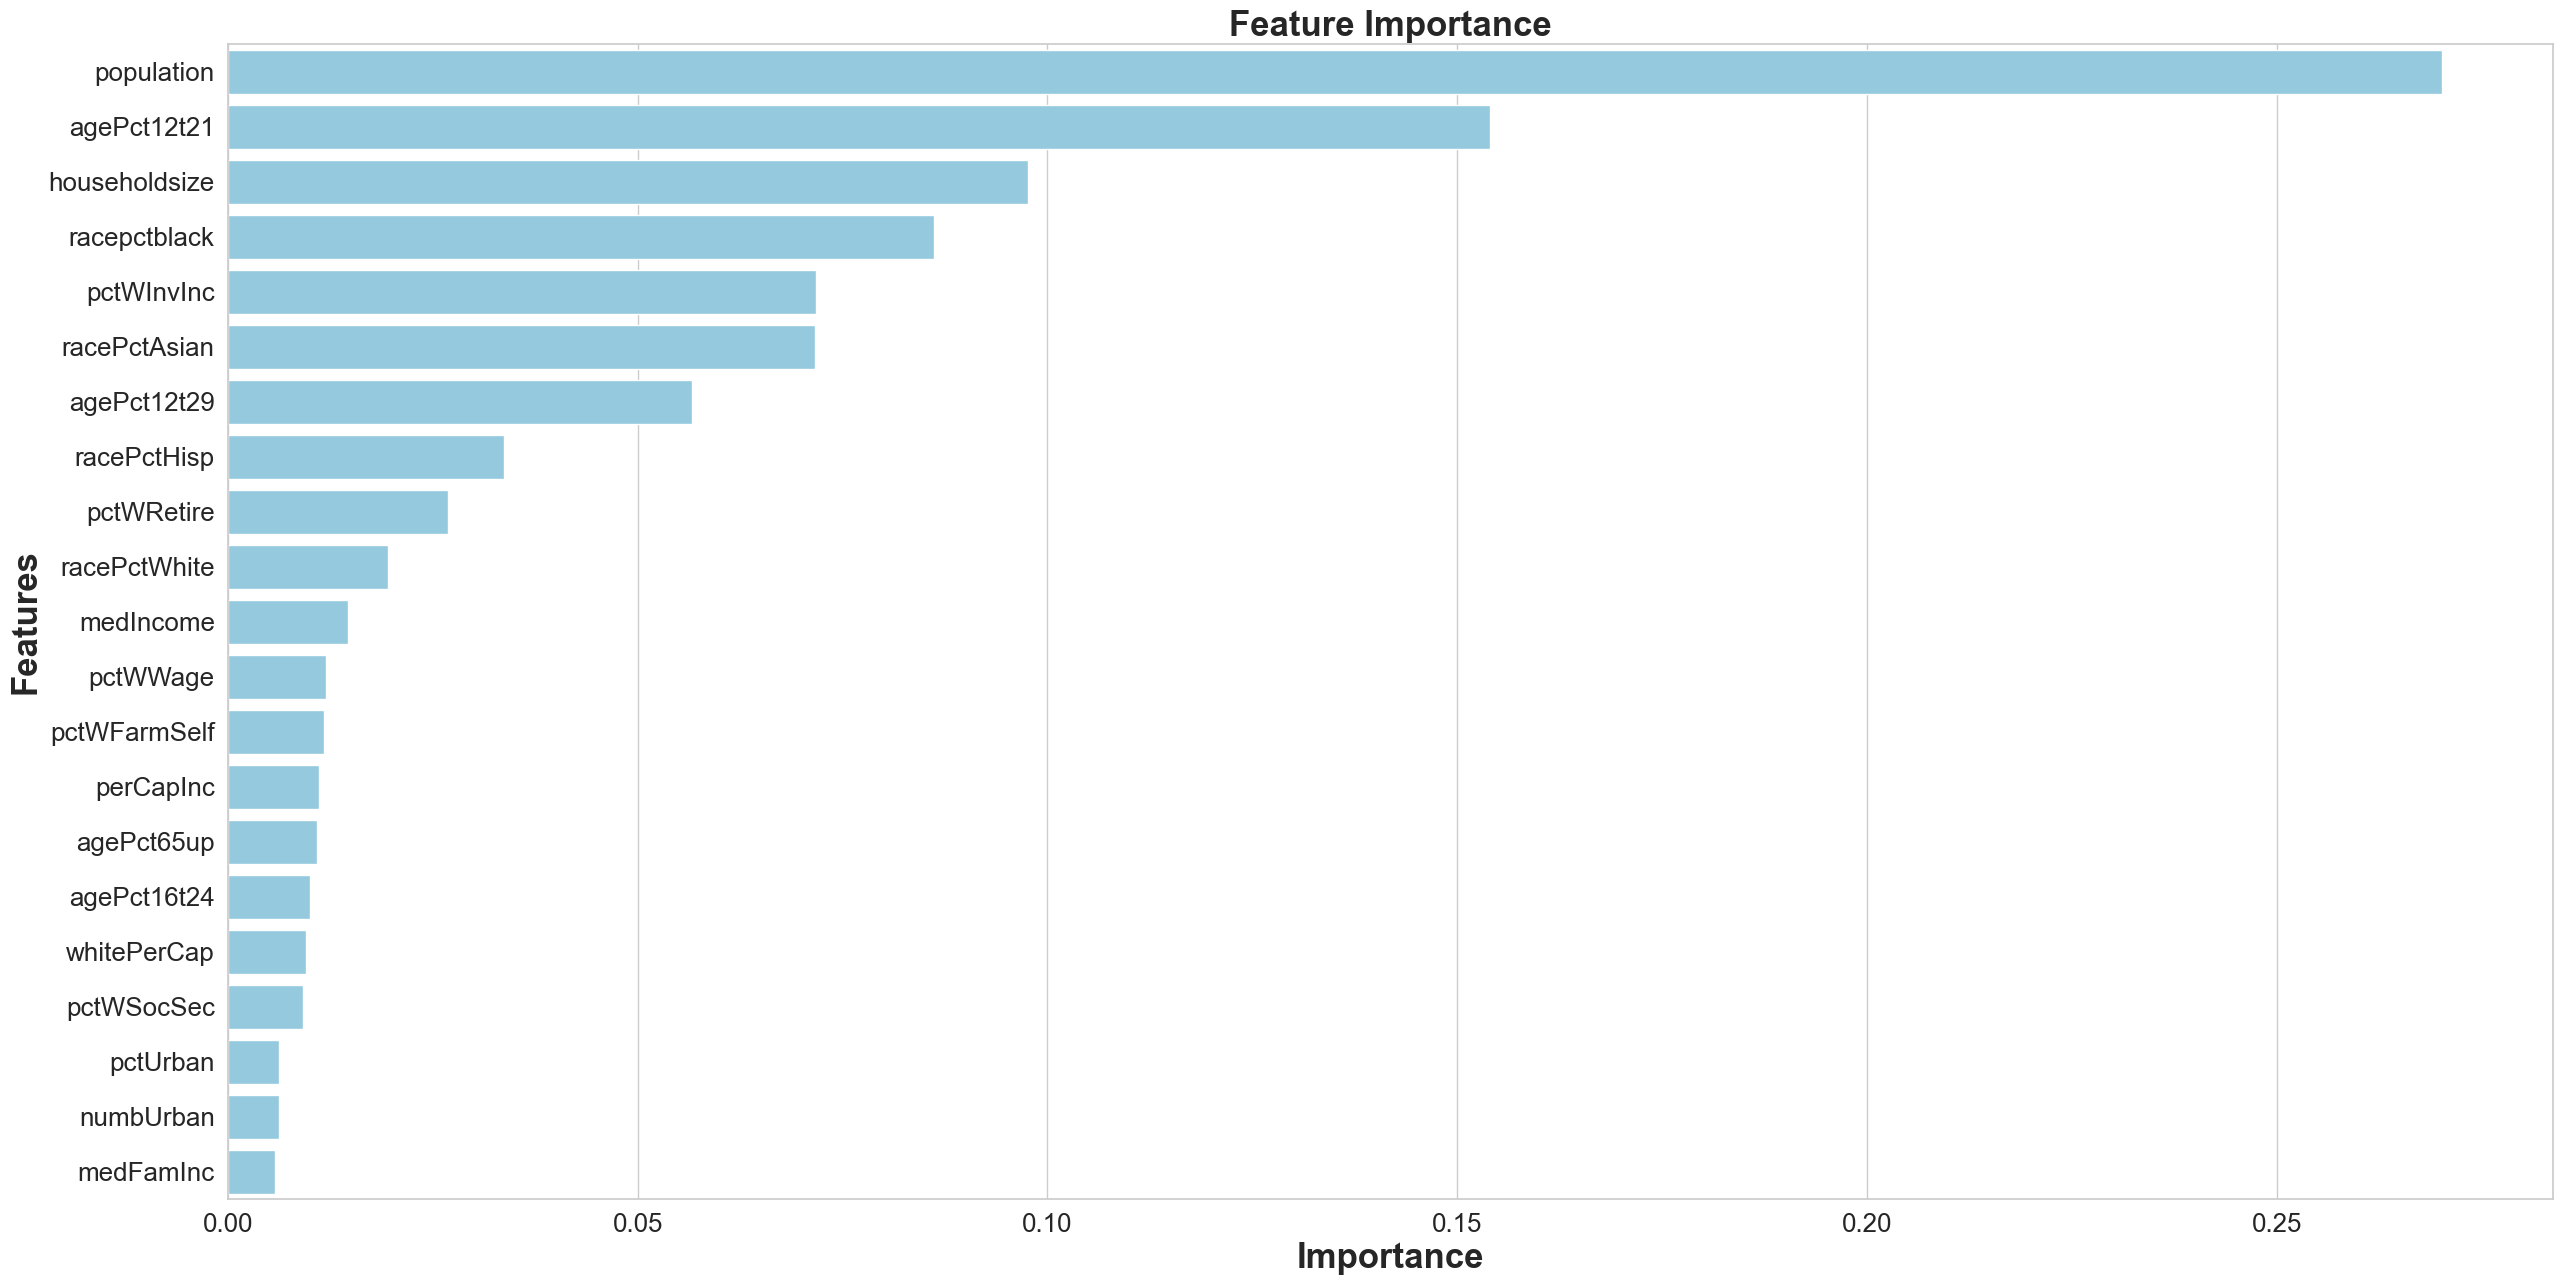

In [73]:
# plot the most important features for PCA & Random forest (Cross Validation)
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances_top['Entropy_Importance'], y=importances_top['Features'], data=importances_top, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
plt.show()

### Receiver Operating Characteristic (ROC)

#### Naive Bays

In [74]:
# Compute the AUC Score
#!pip install scikit-plot
import matplotlib.pyplot as plt

# keep probabilities of positve class only
probs1 = clf1.predict_proba(x_test)[:,1]
auc1 = metrics.roc_auc_score(y_test, probs1)

probs2 = clf2.predict_proba(x_test)[:,1]
auc2 = metrics.roc_auc_score(y_test, probs2)

probs5 = clf5.predict_proba(x_test_pca)[:,1]
auc5 = metrics.roc_auc_score(y_test, probs5)

probs6 = clf6.predict_proba(x_test_pca)[:,1]
auc6 = metrics.roc_auc_score(y_test, probs6)

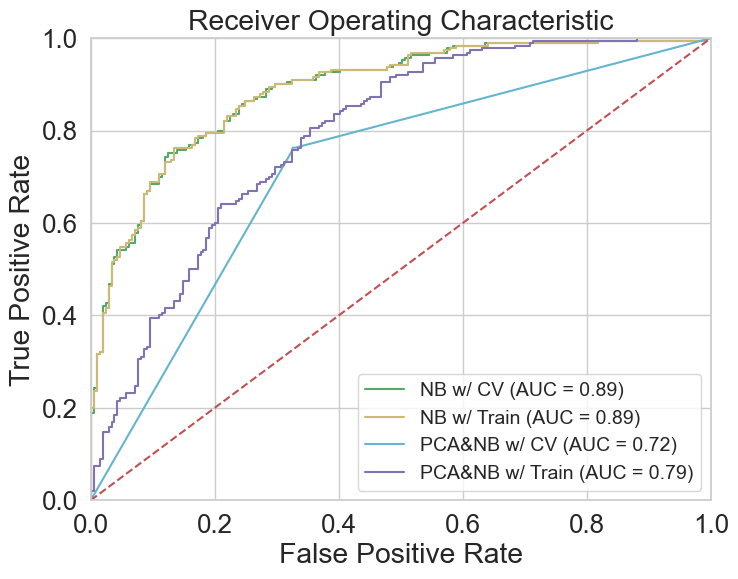

In [75]:
# plot ROC curve for Naive Bays

fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, probs1)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, probs2)
fpr5, tpr5, threshold5 = metrics.roc_curve(y_test, probs5)
fpr6, tpr6, threshold6 = metrics.roc_curve(y_test, probs6)

plt.figure(figsize=(8,6))
plt.plot(fpr1, tpr1, 'g', label = 'NB w/ CV (AUC = %0.2f)' % auc1)
plt.plot(fpr2, tpr2, 'y', label = 'NB w/ Train (AUC = %0.2f)' % auc2)
plt.plot(fpr5, tpr5, 'c', label = 'PCA&NB w/ CV (AUC = %0.2f)' % auc5)
plt.plot(fpr6, tpr6, 'm', label = 'PCA&NB w/ Train (AUC = %0.2f)' % auc6)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right',prop={"size":14})
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Random Forest

In [76]:
probs1r = rfc1.predict_proba(x_test)[:,1]
auc1r = metrics.roc_auc_score(y_test, probs1r)

probs2r = rfc2.predict_proba(x_test)[:,1]
auc2r = metrics.roc_auc_score(y_test, probs2r)

probs3r = rfc3.predict_proba(x_test_pca)[:,1]
auc3r = metrics.roc_auc_score(y_test, probs3r)

probs4r = rfc4.predict_proba(x_test_pca)[:,1]
auc4r = metrics.roc_auc_score(y_test, probs4r)

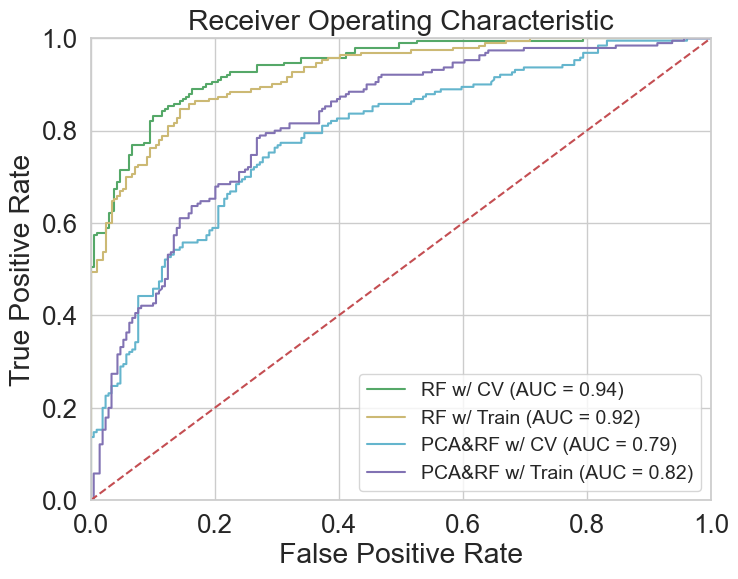

In [77]:
# plot ROC curve for Random Forest

fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, probs1r)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, probs2r)
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, probs3r)
fpr4, tpr4, threshold4 = metrics.roc_curve(y_test, probs4r)

plt.figure(figsize=(8,6))
plt.plot(fpr1, tpr1, 'g', label = 'RF w/ CV (AUC = %0.2f)' % auc1r)
plt.plot(fpr2, tpr2, 'y', label = 'RF w/ Train (AUC = %0.2f)' % auc2r)
plt.plot(fpr3, tpr3, 'c', label = 'PCA&RF w/ CV (AUC = %0.2f)' % auc3r)
plt.plot(fpr4, tpr4, 'm', label = 'PCA&RF w/ Train (AUC = %0.2f)' % auc4r)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right',prop={"size":14})
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()